Let's start by creating some hypothetical data. We'll create a dataset that includes the following:

Counterparty ID: A unique identifier for each counterparty.
Exposure at Default (EAD): The total value that a bank is exposed to at the time of a counterparty's default.
Probability of Default (PD): The likelihood of a counterparty defaulting on its obligations.
Loss Given Default (LGD): The proportion of the total exposure that cannot be recovered after a counterparty defaults.
We'll also include some additional features that might be relevant for our models, such as the counterparty's industry, country, and rating.

In [ ]:
import pandas as pd
import numpy as np
import random

# Set a seed for reproducibility
np.random.seed(0)

# Create a list of unique counterparty IDs
counterparty_ids = range(1, 101)

# Create a list of industries
industries = ['Banking', 'Manufacturing', 'Services', 'Retail', 'Technology']

# Create a list of countries
countries = ['US', 'UK', 'Germany', 'France', 'Switzerland']

# Create a list of ratings
ratings = ['AAA', 'AA', 'A', 'BBB', 'BB', 'B', 'CCC', 'CC', 'C', 'D']

# Generate random EAD, PD, and LGD values
ead = np.random.uniform(low=1e6, high=1e9, size=100)  # Exposure at Default
probability_of_default = np.random.uniform(low=0.01, high=0.2, size=100)  # Probability of Default
lgd = np.random.uniform(low=0.2, high=0.8, size=100)  # Loss Given Default

# Generate random industries, countries, and ratings
industry = [random.choice(industries) for _ in counterparty_ids]
country = [random.choice(countries) for _ in counterparty_ids]
rating = [random.choice(ratings) for _ in counterparty_ids]

# Create a DataFrame
data = pd.DataFrame({'CounterpartyID': counterparty_ids, 'EAD': ead, 'PD': probability_of_default, 'LGD': lgd, 'Industry': industry, 'Country': country, 'Rating': rating})
data.head()

	

Now, let's outline the steps for each of the processes:

Pillar-I: This is the minimum capital requirement under Basel III. The capital requirement is calculated based on the credit risk, market risk, and operational risk. For credit risk, the capital requirement can be calculated using the formula: Capital Requirement = EAD * PD * LGD * 12.5.

CCAR (Comprehensive Capital Analysis and Review): This is a stress test conducted by the Federal Reserve in the US to ensure that banks have enough capital to withstand economic downturns. The banks are required to submit their capital plans, including capital distributions such as dividends and share buybacks, and the Fed evaluates whether the bank can meet its capital requirements under various stress scenarios.

IFRS-9: This is an international financial reporting standard that deals with accounting for financial instruments. It includes requirements for recognizing and measuring financial assets, financial liabilities, and some contracts to buy or sell non-financial items. For credit risk, IFRS-9 introduces an "expected credit loss" model, which requires banks to account for expected losses at the time they issue a loan, rather than waiting until a loss event occurs.

Internal Stress Testing: This involves testing the bank's resilience to various stress scenarios. The exact nature of the stress tests can vary, but they often involve scenarios such as a severe economic downturn, a sharp increase in interest rates, or a major market disruption.

Let's start by calculating the capital requirement for Pillar-I. We'll add this as a new column in our DataFrame.

In [ ]:
# Calculate the capital requirement for Pillar-I
data['Capital_Requirement_PillarI'] = data['EAD'] * data['PD'] * data['LGD'] * 12.5
data.head()

In [ ]:
# Calculate the stressed capital requirement for CCAR
data['Stressed_PD'] = data['PD'] * 1.5  # 50% increase in PD
data['Stressed_LGD'] = data['LGD'] * 1.2  # 20% increase in LGD
data['Capital_Requirement_CCAR'] = data['EAD'] * data['Stressed_PD'] * data['Stressed_LGD'] * 12.5
data.head()

In [ ]:
# Calculate the expected credit loss for IFRS-9
data['Expected_Credit_Loss_IFRS9'] = data['EAD'] * data['PD'] * data['LGD']
data.head()

In [ ]:
# Calculate the stressed capital requirement for internal stress testing
data['Stressed_PD_Internal'] = data['PD'] * 2.0  # 100% increase in PD
data['Stressed_LGD_Internal'] = data['LGD'] * 1.5  # 50% increase in LGD
data['Capital_Requirement_Internal_Stress_Test'] = data['EAD'] * data['Stressed_PD_Internal'] * data['Stressed_LGD_Internal'] * 12.5
data.head()

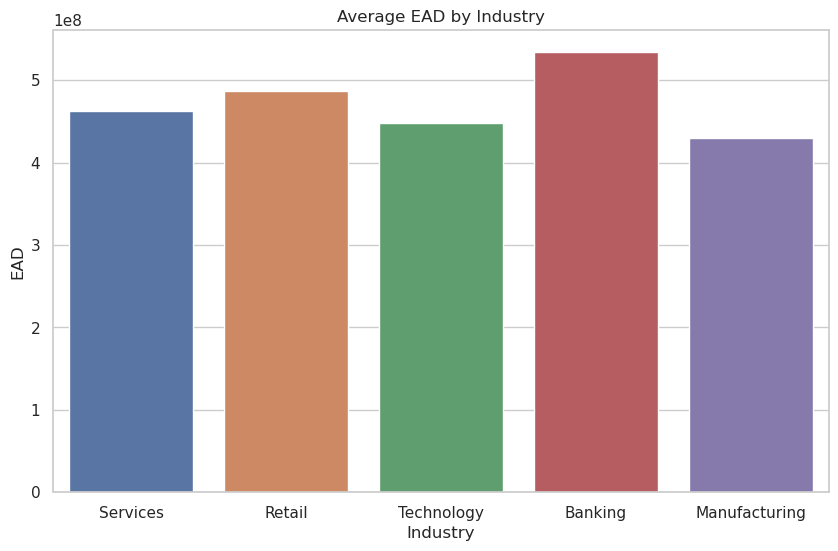

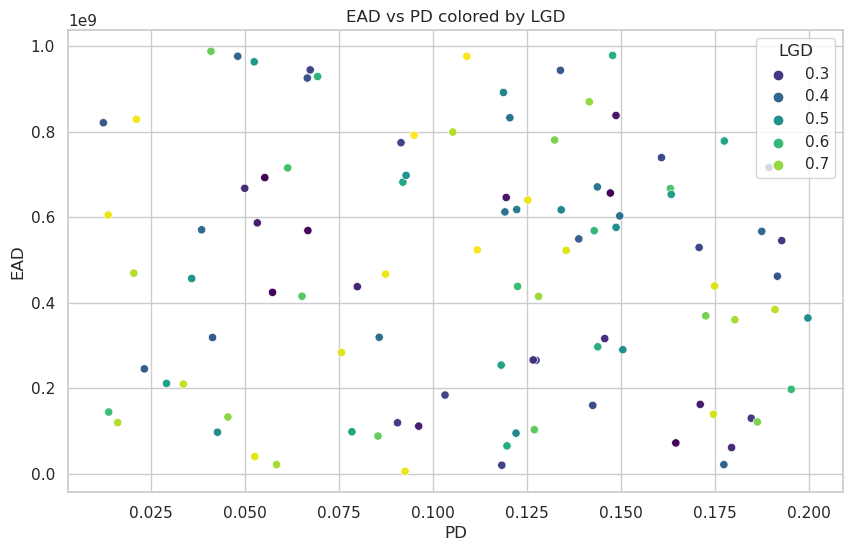

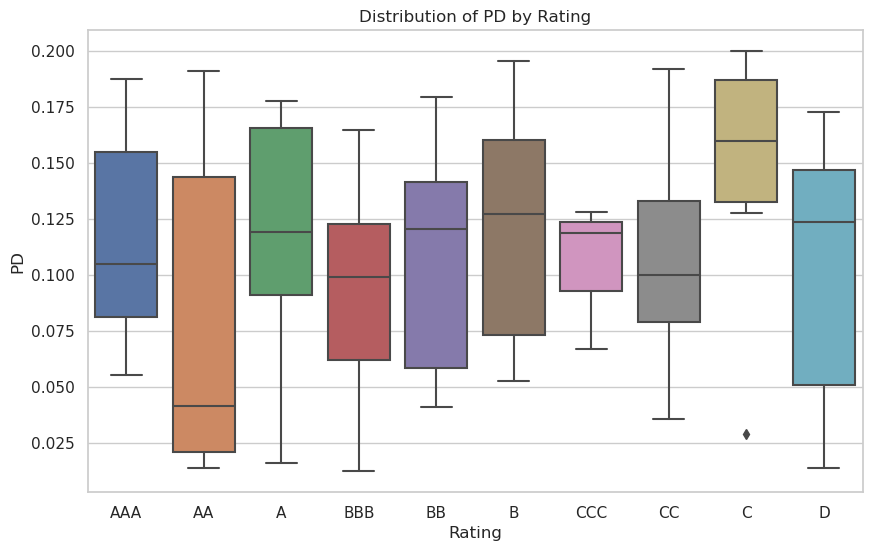

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn for our plots
sns.set(style='whitegrid')

# Create a bar plot for the average EAD by industry
plt.figure(figsize=(10, 6))
sns.barplot(x='Industry', y='EAD', data=data, estimator=np.mean, ci=None)
plt.title('Average EAD by Industry')
plt.show()

# Create a scatter plot for EAD vs PD, colored by LGD
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PD', y='EAD', hue='LGD', data=data, palette='viridis')
plt.title('EAD vs PD colored by LGD')
plt.show()

# Create a box plot for the distribution of PD by Rating
plt.figure(figsize=(10, 6))
sns.boxplot(x='Rating', y='PD', data=data, order=ratings)
plt.title('Distribution of PD by Rating')
plt.show()

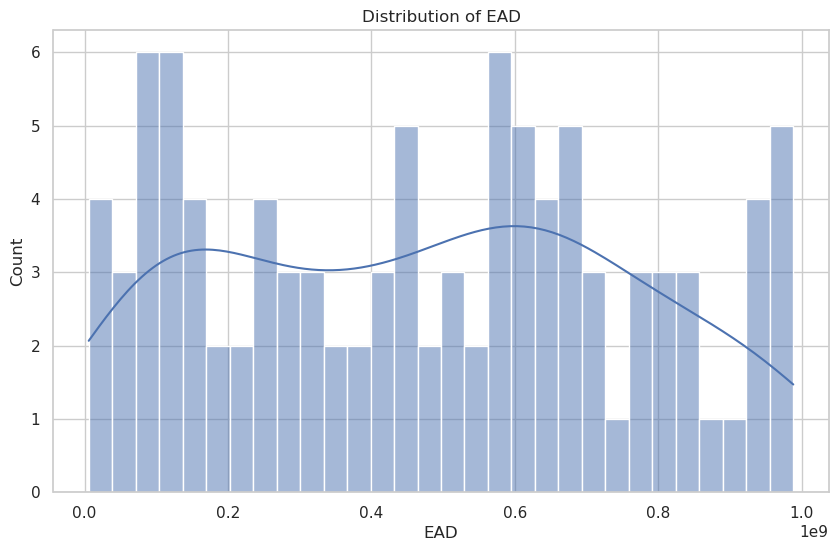

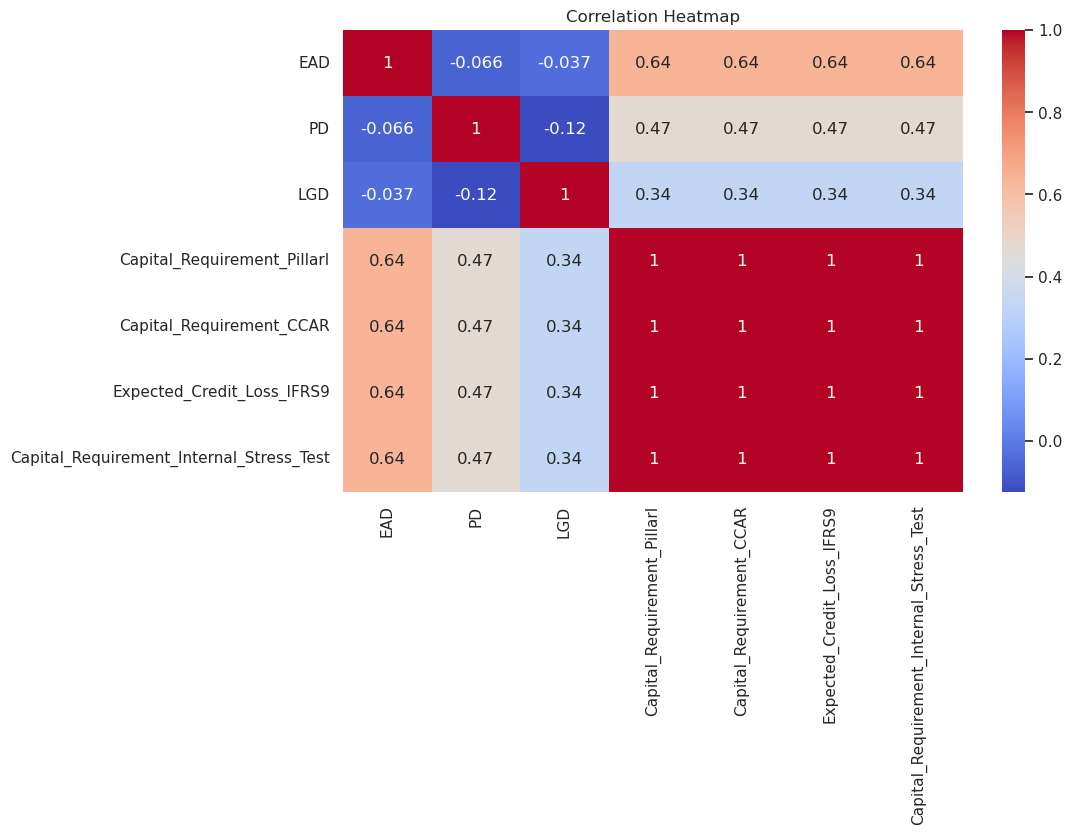

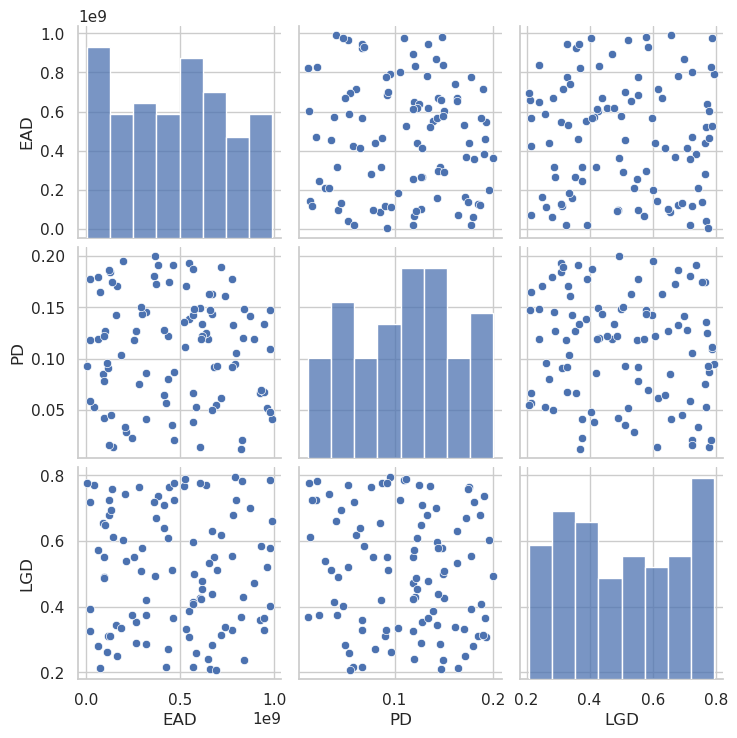

In [ ]:
# Create a histogram for the distribution of EAD
plt.figure(figsize=(10, 6))
sns.histplot(data['EAD'], bins=30, kde=True)
plt.title('Distribution of EAD')
plt.show()

# Create a heatmap for the correlation between numerical features
plt.figure(figsize=(10, 6))
sns.heatmap(data[['EAD', 'PD', 'LGD', 'Capital_Requirement_PillarI', 'Capital_Requirement_CCAR', 'Expected_Credit_Loss_IFRS9', 'Capital_Requirement_Internal_Stress_Test']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Create a pairplot for the numerical features
sns.pairplot(data[['EAD', 'PD', 'LGD']])
plt.show()